In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/FE-test/MRSFEA-new/Music/MusicData.csv')
columns = ["length","danceability","acousticness","energy","instrumentalness","valence","loudness","speechiness","tempo"]
data = dataset[columns]
data.shape

(686, 9)

In [4]:
data.head()

,length,danceability,acousticness,energy,instrumentalness,valence,loudness,speechiness,tempo
0,379266,0.866,0.13700,0.730,0.000000,0.625,-8.201,0.0767,118.523
1,318800,0.381,0.01890,0.832,0.196000,0.166,-5.069,0.0492,120.255
2,217946,0.346,0.91300,0.139,0.000077,0.116,-15.326,0.0321,136.168
3,233000,0.466,0.08900,0.438,0.000006,0.587,-12.858,0.0608,193.100
4,268000,0.419,0.00171,0.932,0.000000,0.445,-3.604,0.1060,169.881


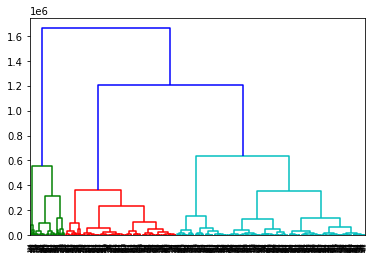

In [5]:
import seaborn as sns
# Using Dendrograms to find the right number of clustres 

import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(data, method = 'ward'))

In [6]:
# Fitting Agglomerative clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

agglomerative = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters = 3)

sc1 = StandardScaler()
scaled_data1 = sc1.fit_transform(data)
labels = agglomerative.fit_predict(scaled_data1)

np.unique(labels)

array([0, 1, 2])

In [7]:
scaled_data1.shape

(686, 9)

In [8]:
data["labels"] = labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
scaled_data1.shape

(686, 9)

In [10]:
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=0.95)

sc = StandardScaler()
scaled_data = sc.fit_transform(data.iloc[:,:-1])
pca.fit(scaled_data)

print(pca.explained_variance_ratio_)

pca = PCA(n_components=2)
pca.fit(scaled_data)
transformed_data = pca.transform(scaled_data)

print(data.columns)

[0.45122597 0.13229815 0.1177151  0.09498706 0.07156423 0.05747778
 0.04891066]
Index(['length', 'danceability', 'acousticness', 'energy', 'instrumentalness',
       'valence', 'loudness', 'speechiness', 'tempo', 'labels'],
      dtype='object')


In [11]:
transformed_data = pd.DataFrame(transformed_data, columns = ["PCA1","PCA2"])
transformed_data["labels"] = labels

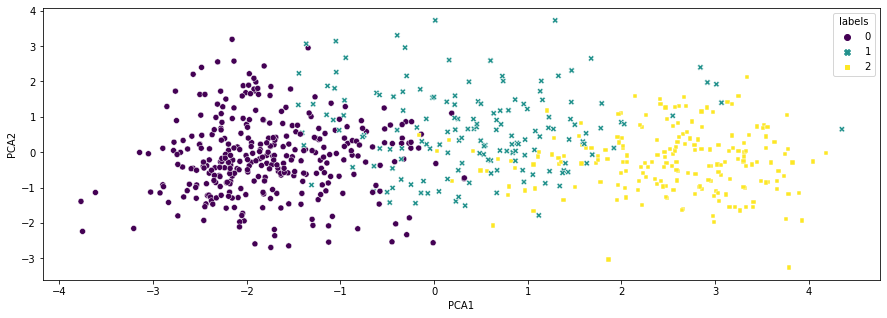

In [12]:
plt.figure(figsize = (15,5))
sns.scatterplot(data = transformed_data, x = "PCA1", y = "PCA2", hue = "labels", style = "labels", palette="viridis")

In [13]:
### PCA is used to visualize the clusters

In [14]:
from sklearn.neighbors import NearestNeighbors

In [15]:
nn = NearestNeighbors(n_neighbors=10, radius = 10, metric = "euclidean")

scaled_data1.shape

nn.fit(scaled_data1)

data.groupby("labels").mean()

,length,danceability,acousticness,energy,instrumentalness,valence,loudness,speechiness,tempo
labels,,,,,,,,,
0,221233.174847,0.573221,0.105007,0.787472,0.107613,0.508834,-6.256773,0.070064,126.765819
1,264623.725000,0.455902,0.607016,0.365848,0.177386,0.223786,-11.163988,0.038094,115.811506
2,188435.740000,0.417824,0.885866,0.165130,0.881845,0.166133,-20.421670,0.040356,109.354460


In [16]:
cluster_means = sc1.transform(data.groupby("labels").mean())

In [17]:
select_cluster = 2

cluster_means[select_cluster].reshape(1,-1)

cluster1 = cluster_means[select_cluster].reshape(1,-1)
distance, index = nn.kneighbors(X=cluster1, n_neighbors=10)

data.loc[index[0]]

,length,danceability,acousticness,energy,instrumentalness,valence,loudness,speechiness,tempo,labels
121,182222,0.391,0.969,0.23100,0.954,0.0882,-17.000,0.0363,107.981,2
263,163666,0.387,0.993,0.00579,0.929,0.1370,-21.823,0.0439,111.991,2
95,162085,0.421,0.940,0.13600,0.890,0.0505,-23.521,0.0305,110.036,2
562,177322,0.506,0.992,0.04340,0.866,0.0823,-19.948,0.0442,110.723,2
264,158666,0.479,0.771,0.22100,0.856,0.0890,-19.689,0.0325,115.965,2
158,226400,0.339,0.937,0.14200,0.910,0.1210,-21.613,0.0416,109.980,2
490,164703,0.437,0.984,0.07470,0.914,0.1750,-20.209,0.0648,117.078,2
550,205695,0.410,0.988,0.08450,0.930,0.0795,-21.814,0.0327,92.033,2
316,152456,0.383,0.988,0.10100,0.919,0.2420,-18.306,0.0427,119.709,2
448,200000,0.368,0.810,0.29300,0.864,0.1970,-16.379,0.0346,119.977,2


In [18]:
data["mood"] = dataset["mood"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
data["mood"]

0      Happy
1        Sad
2        Sad
3      Happy
4      Angry
       ...  
681     Calm
682      Sad
683      Sad
684      Sad
685     Calm
Name: mood, Length: 686, dtype: object

0 has both Happy and Energetic songs, Cluster 1 has sad songs and cluster 2 has calm songs

In [21]:
data["mood"].unique()

array(['Happy', 'Sad', 'Angry', 'Calm'], dtype=object)

In [22]:
mood = data["mood"].map({"Happy":0, "Angry":0,"Sad":1, "Calm":2})

In [23]:
confusion_matrix(mood, data["labels"])

array([[276,  18,   0],
       [ 50, 130,  17],
       [  0,  12, 183]])

In [24]:
from sklearn.metrics import classification_report

print(classification_report(mood, data["labels"]))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       294
           1       0.81      0.66      0.73       197
           2       0.92      0.94      0.93       195

    accuracy                           0.86       686
   macro avg       0.86      0.85      0.85       686
weighted avg       0.86      0.86      0.85       686



In [25]:
dataset.groupby("mood").mean().iloc[:,1:-2]

,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo
mood,,,,,,,,,,
Angry,215779.948052,0.512240,0.028229,0.883669,0.056607,0.233897,0.437049,-4.695844,0.079170,132.060636
Calm,193977.061538,0.406815,0.883348,0.156325,0.890769,0.115418,0.151421,-20.955826,0.040742,108.851215
Happy,230963.850000,0.622914,0.127849,0.751857,0.126103,0.201682,0.579095,-7.275750,0.061774,124.213679
Sad,247504.472081,0.497245,0.578826,0.388068,0.201832,0.140655,0.289372,-10.569183,0.041736,115.599746


In [26]:
data.groupby("labels").mean()

,length,danceability,acousticness,energy,instrumentalness,valence,loudness,speechiness,tempo
labels,,,,,,,,,
0,221233.174847,0.573221,0.105007,0.787472,0.107613,0.508834,-6.256773,0.070064,126.765819
1,264623.725000,0.455902,0.607016,0.365848,0.177386,0.223786,-11.163988,0.038094,115.811506
2,188435.740000,0.417824,0.885866,0.165130,0.881845,0.166133,-20.421670,0.040356,109.354460


In [27]:
data.groupby("labels").mean().loc[1]

length              264623.725000
danceability             0.455902
acousticness             0.607016
energy                   0.365848
instrumentalness         0.177386
valence                  0.223786
loudness               -11.163988
speechiness              0.038094
tempo                  115.811506
Name: 1, dtype: float64

In [28]:
cluster_means

array([[-0.00881272,  0.45749611, -0.83995388,  0.85755463, -0.58992288,
         0.65998931,  0.70670214,  0.38985181,  0.26352844],
       [ 0.67609036, -0.2811084 ,  0.38317516, -0.43477194, -0.41983616,
        -0.47061729,  0.04917914, -0.38343146, -0.11476014],
       [-0.52650756, -0.52083193,  1.06258469, -1.04999649,  1.29744322,
        -0.69928875, -1.19126779, -0.32871328, -0.33774326]])

In [29]:
sadparams = cluster_means[1].reshape(1,-1)
calmparams = cluster_means[2].reshape(1,-1)

In [30]:
data.groupby("labels").mean()

,length,danceability,acousticness,energy,instrumentalness,valence,loudness,speechiness,tempo
labels,,,,,,,,,
0,221233.174847,0.573221,0.105007,0.787472,0.107613,0.508834,-6.256773,0.070064,126.765819
1,264623.725000,0.455902,0.607016,0.365848,0.177386,0.223786,-11.163988,0.038094,115.811506
2,188435.740000,0.417824,0.885866,0.165130,0.881845,0.166133,-20.421670,0.040356,109.354460


In [31]:
import joblib

joblib.dump(sadparams,"sadParams.wt")
joblib.dump(calmparams,"calmParams.wt")
joblib.dump(nn, "NearestNeighberSadCalm.pkl")


['NearestNeighberSadCalm.pkl']

In [32]:
nn2 = joblib.load("NearestNeighberSadCalm.pkl")

In [33]:
sadparams

array([[ 0.67609036, -0.2811084 ,  0.38317516, -0.43477194, -0.41983616,
        -0.47061729,  0.04917914, -0.38343146, -0.11476014]])

In [34]:
distance, index = nn2.kneighbors(sadparams)

In [35]:
list(dataset.loc[index[0]]["id"].values)

['5Iy1wdO0tMaHwKnfFYtlel',
 '0L6lVIgGqVHnmR3BIy8GHa',
 '6kyxQuFD38mo4S3urD2Wkw',
 '2SbIONplUQ0BvXyRgGDgCz',
 '3U4isOIWM3VvDubwSI3y7a',
 '2KSCegx6TosQQEgmhJKNQa',
 '4gkoh2vAD57fGEITzteaUh',
 '0x4CFzoSdqVq5qTGgwZFuX',
 '5AqPW3fH2H4ORBYTVwfHep',
 '6ruBSXfnFc6raFDFm9YB3r']

From the cluster centers, it can be concluded that cluster 0 has both Happy and Energetic songs, Cluster 1 has sad songs and cluster 2 has calm songs

To identify difference between Happy and Energetic, let's do some EDA

In [36]:
happyener = dataset[(dataset["mood"] == "Happy") | (dataset["mood"] == "Angry")].reset_index(drop = True)

In [37]:
import seaborn as sns

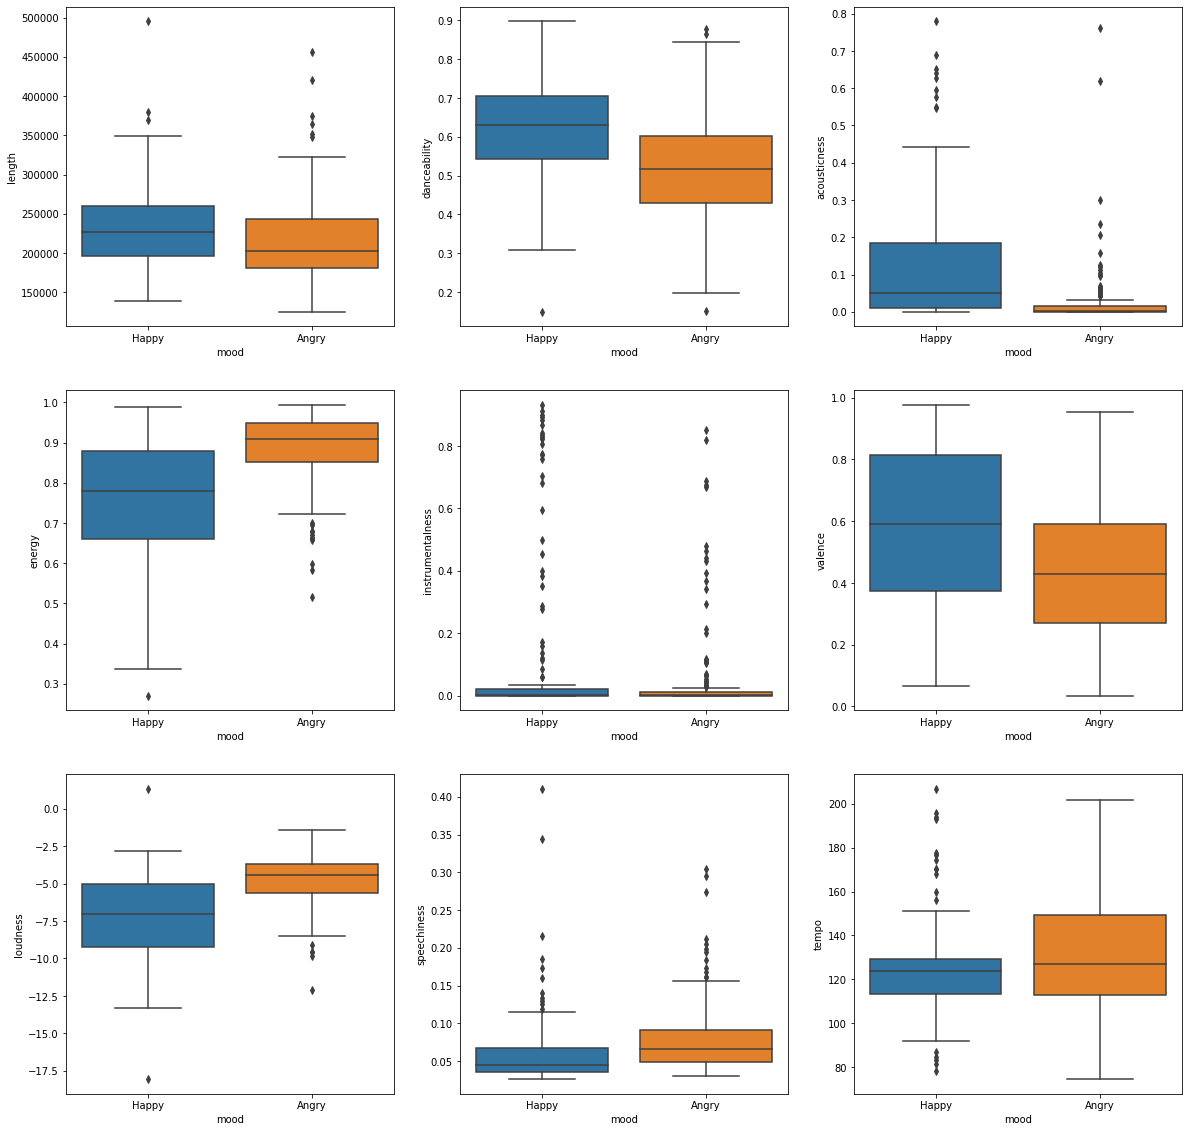

In [38]:
features = ["length", "danceability" ,"acousticness" ,"energy" ,"instrumentalness", "valence","loudness" ,"speechiness", "tempo"]
fig,ax = plt.subplots(3,3, figsize= (20,20))
ax = ax.flatten()
for idx,feature in enumerate(features):
    sns.boxplot(y = feature, x = "mood", data = happyener, ax = ax[idx])

Danceabilty, acousticness, energy, loudness, speechiness are distinctive features of happy and energetic

In [39]:
# Importing the dataset

columns = ["danceability","acousticness","energy","loudness","speechiness"]
data1 = happyener[columns]
data1.shape

(294, 5)

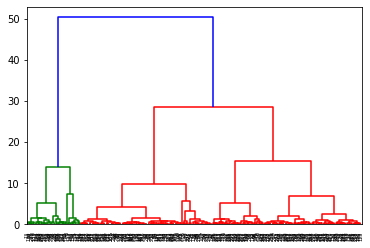

In [40]:
import seaborn as sns
# Using Dendrograms to find the right number of clustres 

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data1, method = 'ward'))

In [41]:
# Fitting Agglomerative clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
agglomerative = AgglomerativeClustering(affinity='euclidean', linkage='ward', n_clusters = 2)

sc2 = StandardScaler()
scaled_data2 = sc2.fit_transform(data1)
labels = agglomerative.fit_predict(scaled_data2)

np.unique(labels)

array([0, 1])

In [42]:
data1["labels"] = labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler

pca1 = PCA(n_components=0.95)

pca1.fit(scaled_data2)

print(pca.explained_variance_ratio_)

pca1 = PCA(n_components=2)
pca1.fit(scaled_data2)
transformed_data1 = pca1.transform(scaled_data2)

print(data1.columns)

[0.45122597 0.13229815]
Index(['danceability', 'acousticness', 'energy', 'loudness', 'speechiness',
       'labels'],
      dtype='object')


In [44]:
transformed_data1 = pd.DataFrame(transformed_data1, columns = ["PCA1","PCA2"])
transformed_data1["labels"] = labels

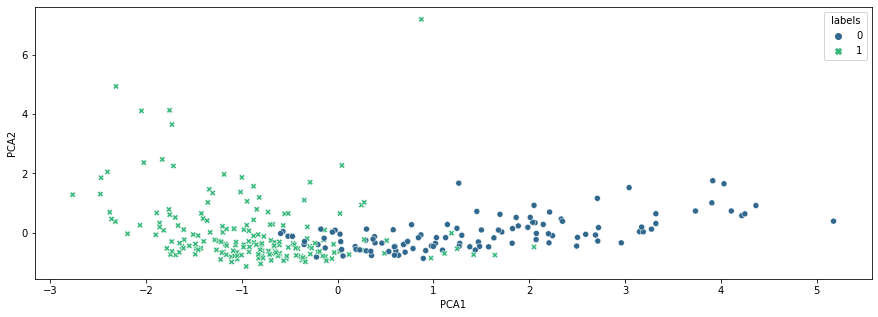

In [45]:
plt.figure(figsize = (15,5))
sns.scatterplot(data = transformed_data1, x = "PCA1", y = "PCA2", hue = "labels", style = "labels", palette="viridis")

In [46]:
from sklearn.neighbors import NearestNeighbors

In [47]:
data1.groupby("labels").mean()

,danceability,acousticness,energy,loudness,speechiness
labels,,,,,
0,0.672856,0.166539,0.715288,-7.855901,0.048445
1,0.499486,0.020548,0.884962,-4.752787,0.084498


In [48]:
select_cluster = 1

nn = NearestNeighbors(n_neighbors=10, radius = 10, metric = "euclidean")

nn.fit(scaled_data2)

data1.groupby("labels").mean()

cluster_means = sc2.transform(data1.groupby("labels").mean())


cluster1 = cluster_means[select_cluster].reshape(1,-1)
distance, index = nn.kneighbors(X=cluster1, n_neighbors=10)

data1.loc[index[0]]

,danceability,acousticness,energy,loudness,speechiness,labels
148,0.475,0.000121,0.907,-5.064,0.0941,1
93,0.467,0.005780,0.876,-4.841,0.0693,1
284,0.526,0.001380,0.867,-4.332,0.0659,1
292,0.547,0.004850,0.877,-5.135,0.0658,1
9,0.492,0.000444,0.950,-4.195,0.0760,1
90,0.481,0.023800,0.922,-4.170,0.0640,1
185,0.440,0.002220,0.919,-4.462,0.0735,1
117,0.502,0.000214,0.920,-4.588,0.0611,1
24,0.531,0.000508,0.892,-4.540,0.0582,1
169,0.563,0.012200,0.882,-4.755,0.0596,1


In [49]:
happyParams = cluster_means[0].reshape(1,-1)
AngryParams = cluster_means[1].reshape(1,-1)



joblib.dump(happyParams,"happyParams.wt")
joblib.dump(AngryParams,"angryParams.wt")
joblib.dump(nn, "NearestNeighberHappyAngry.pkl")

['NearestNeighberHappyAngry.pkl']

In [50]:
data1["mood"] = happyener["mood"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
data1

,danceability,acousticness,energy,loudness,speechiness,labels,mood
0,0.866,0.137000,0.730,-8.201,0.0767,0,Happy
1,0.466,0.089000,0.438,-12.858,0.0608,0,Happy
2,0.419,0.001710,0.932,-3.604,0.1060,1,Angry
3,0.586,0.000155,0.935,-9.386,0.0482,0,Happy
4,0.603,0.014400,0.908,-5.254,0.1840,1,Angry
...,...,...,...,...,...,...,...
289,0.663,0.065500,0.671,-6.103,0.0395,0,Angry
290,0.686,0.053400,0.775,-7.247,0.1850,1,Happy
291,0.621,0.170000,0.901,-5.396,0.0302,0,Happy
292,0.547,0.004850,0.877,-5.135,0.0658,1,Angry


In [52]:
data1["actual label"] = data1["mood"].apply(lambda x: 0 if x == "Happy" else 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
data1[["labels", "actual label"]].value_counts()

labels  actual label
1       1               132
0       0                89
1       0                51
0       1                22
dtype: int64

In [54]:
confusion_matrix(data1["actual label"], data1["labels"])

array([[ 89,  51],
       [ 22, 132]])

In [55]:
from sklearn.metrics import classification_report

print(classification_report(data1["actual label"], data1["labels"]))

              precision    recall  f1-score   support

           0       0.80      0.64      0.71       140
           1       0.72      0.86      0.78       154

    accuracy                           0.75       294
   macro avg       0.76      0.75      0.75       294
weighted avg       0.76      0.75      0.75       294

